<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Project/blob/main/Meteorological_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/My Drive/weatherHistory.csv")

In [4]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
df.count()

Formatted Date              96453
Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [7]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df_new = df.drop(['Precip Type','Summary','Daily Summary'],axis=1)
df_new.head(10)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
5,2006-04-01 05:00:00.000 +0200,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66
6,2006-04-01 06:00:00.000 +0200,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72
7,2006-04-01 07:00:00.000 +0200,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84
8,2006-04-01 08:00:00.000 +0200,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37
9,2006-04-01 09:00:00.000 +0200,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.6+ MB


In [10]:
df_new['Formatted Date'] = pd.to_datetime(df_new['Formatted Date'],utc=True)
df_new.dtypes

Formatted Date              datetime64[ns, UTC]
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
dtype: object

In [11]:
def_new=df_new.set_index('Formatted Date')
def_new.head(3)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94


In [12]:
df_fin=def_new.resample('M').mean()
df_fin.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
2006-01-31 00:00:00+00:00,-1.677942,-4.173708,0.834610,8.894211,161.018817,7.894064,0.0,1021.204960
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,0.0,995.183914
2006-03-31 00:00:00+00:00,4.559274,1.969780,0.778737,14.421488,195.059140,9.602590,0.0,976.436263
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,0.0,1013.493694


In [13]:
df_fin.shape

(133, 8)

In [14]:
df_fin.index.month

Int64Index([12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Formatted Date', length=133)

In [15]:
df_1=df_fin[df_fin.index.month==4]
df_1.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-30 00:00:00+00:00,12.635031,12.098827,0.728625,10.930670,191.877778,10.626760,0.0,1013.493694
2007-04-30 00:00:00+00:00,12.348071,11.894421,0.536361,9.917891,182.452778,11.969210,0.0,1009.733667
2008-04-30 00:00:00+00:00,11.804622,11.183688,0.693194,11.648372,192.825000,11.099631,0.0,1003.999611
2009-04-30 00:00:00+00:00,14.559159,14.267076,0.567847,11.419797,136.629167,11.576146,0.0,1011.643556
2010-04-30 00:00:00+00:00,12.194329,11.639406,0.706875,11.148423,181.491667,10.445412,0.0,1016.390028


In [17]:
df_1.shape

(11, 8)

In [43]:
import scipy.stats as stats
ttest,p_value=stats.ttest_ind(a=df_1['Apparent Temperature (C)'],b=df_fin['Humidity'],equal_var=False)
p_value

2.683533310617145e-12

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


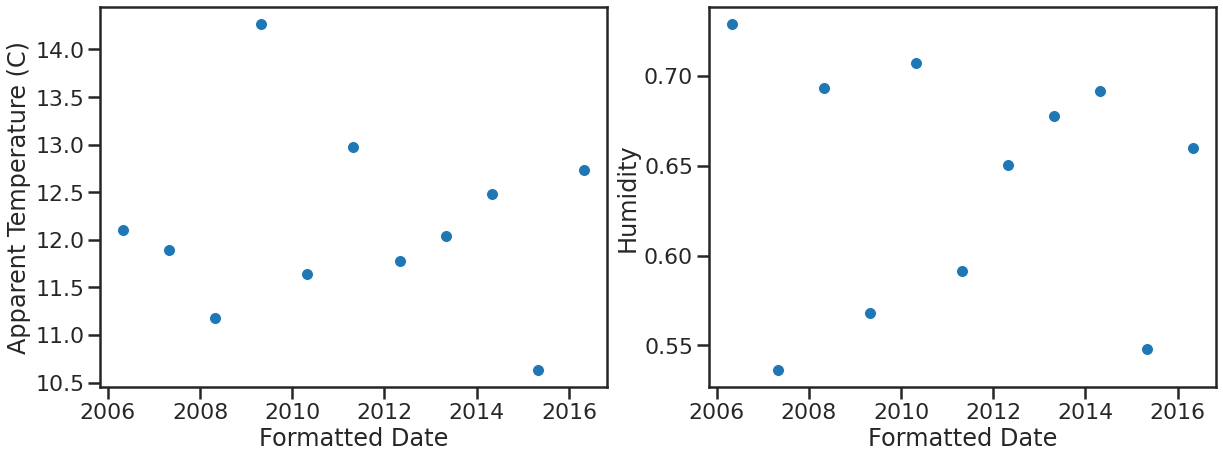

In [44]:
sns.set_style("ticks")
sns.set_context("poster")
fig , axes = plt.subplots(1,2,squeeze=False,figsize=(20,7))
sns.scatterplot(df_1.index,df_1['Apparent Temperature (C)'],ax=axes[0][0])
sns.scatterplot(df_1.index,df_1['Humidity'],ax=axes[0][1])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


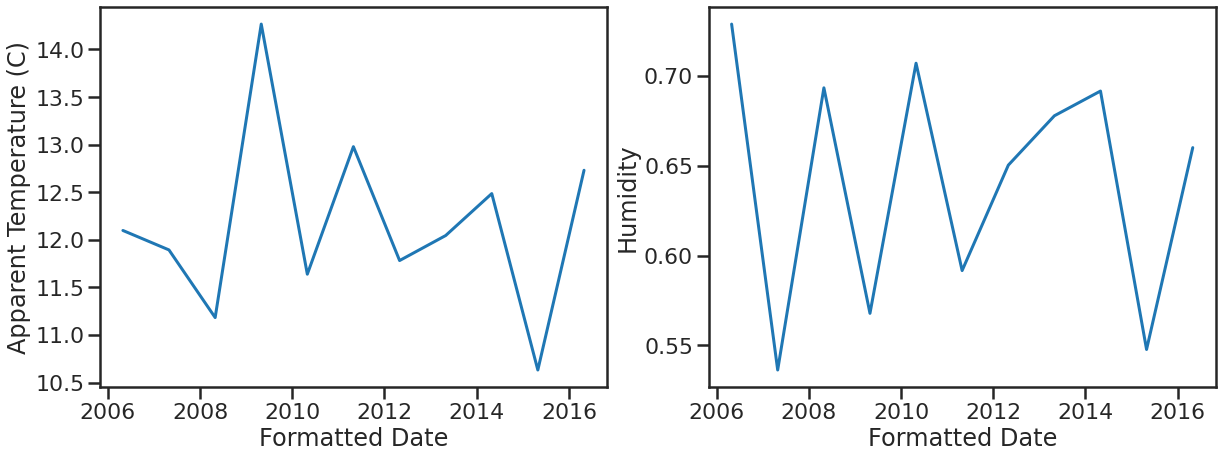

In [45]:
sns.set_style("ticks")
fig,axes=plt.subplots(1,2,squeeze=False,figsize=(20,7))
sns.lineplot(df_1.index,df_1['Apparent Temperature (C)'],ax=axes[0][0])
sns.lineplot(df_1.index,df_1['Humidity'],ax=axes[0][1])

In [46]:

df_2=df_fin[df_fin.index.month==2]
df_2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2006-02-28 00:00:00+00:00,-0.065394,-2.990716,0.843467,10.957008,197.886905,7.418794,0.0,995.183914
2007-02-28 00:00:00+00:00,4.876356,2.639848,0.815015,12.474625,199.485119,9.538364,0.0,1010.726116
2008-02-29 00:00:00+00:00,4.089192,1.915597,0.682615,11.718533,210.472701,9.617645,0.0,1016.177371
2009-02-28 00:00:00+00:00,1.837963,-1.641237,0.821161,14.799302,213.071429,9.659449,0.0,1006.136250
2010-02-28 00:00:00+00:00,1.449363,-1.662045,0.851682,13.045456,186.043155,7.017611,0.0,1008.866042


In [47]:
df_2.shape

(11, 8)

In [48]:
import scipy.stats as stats
ttest,p_value=stats.ttest_ind(a=df_2['Apparent Temperature (C)'],b=df['Humidity'],equal_var=False)
p_value

0.2679685807948354